In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv(r"C:\Users\Nida\PyCharmMiscProject\Month2_OpenCV\Task4_Spam_Detection\sms.tsv", sep="\t", header=None)

df.columns = ["label", "message"]

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df["label"] = df["label"].map({
    "ham":0,
    "spam":1
})

df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df["message"])

y = df["label"]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [17]:
from sklearn.metrics import accuracy_score

prediction = model.predict(X_test)

accuracy = accuracy_score(y_test,prediction)

print("Accuracy:", accuracy)

Accuracy: 0.9668161434977578


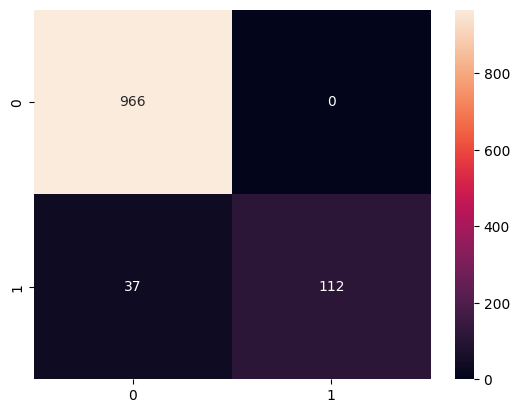

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,prediction)

sns.heatmap(cm,annot=True,fmt="d")

plt.show()